# The Math of Intelligence (Week 1) - Support Vector Machine Classification


### 우리는 무엇을 할 것인가?

- 우리는 그래디언트 디센트를 사용하여 두개의 toy data class 사이에서 최적의 hyperplane을 찾는 Support Vector Machine을 구축 할 것입니다. 

### SVM을 사용하는 사례는 무엇 입니까?

- 분류, 회귀(시계열 예측 등), 이상치 검출, 클러스터링

### 다른 예시들
- Scikit-learn의 SVM 기능을 사용하여 이미지 분류하기
- Pulse 분류,보다 유용한 데이터 세트

### SVM은 다른 ML 알고리즘과 어떻게 비교됩니까?

<img src="https://camo.githubusercontent.com/3613584ae0fb8f1ec3f1c549a607a7969aa00d47/68747470733a2f2f696d6167652e736c696465736861726563646e2e636f6d2f6d736370726573656e746174696f6e2d3134303732323036353835322d70687061707030312f39352f6d73632d70726573656e746174696f6e2d62696f696e666f726d61746963732d372d3633382e6a70673f63623d31343036303132363130" />

- 일반적으로 SVM은 이상치가 적은 상대적으로 작은 데이터 세트에 적합합니다.
- 다른 알고리즘 (랜덤 포리스트, 심층 신경 네트워크 등)은 더 많은 데이터가 필요하지만 거의 항상 강력한 모델을 제공합니다.
- 사용할 분류 기준은 데이터 세트와 문제의 일반적인 복잡성에 따라 결정됩니다.
- "조기 최적화는 프로그래밍의 모든 악 (또는 적어도 대부분)의 뿌리입니다." - Donald Knuth, CS 교수 (튜링 상 연설 1974)

### Support Vector Machine이란 무엇입니까?
- 분류 또는 회귀 문제 모두에 사용할 수있는 supervised machine learning algorithm 입니다. 그러나 일반적으로 분류에 사용됩니다. 2 개 이상의 분류 된 데이터 클래스가 주어지면 모든 클래스를 분리하는 최적의 hyperplane에 의해 형식적으로 정의 된 차별 분류 자의 역할을 합니다. 그 다음 동일한 공간에 매핑되는 새로운 예제는 간격의 어느쪽에 떨어지는지를 기준으로 분류 할 수 있습니다.

### Support Vectors 란 무엇입니까?
<img src = "https://camo.githubusercontent.com/ae3d247a4c7cf5bc9f4134a1a90c0df69b39e988/68747470733a2f2f7777772e64747265672e636f6d2f75706c6f616465642f70616765696d672f53766d4d617267696e322e6a7067" />

- Support Vector는 분리 된 hyperplane의 위치를 변경하는 데이터 집합의 점인 hyperplane에 가장 가까운 데이터 점입니다. 이 때문에 데이터 집합의 중요한 요소로 간주 될 수 있으며 SVM을 구축하는 데 도움이됩니다.

### Hyperplane 이란 무엇입니까?
<img src="https://camo.githubusercontent.com/6386085571d1ec30762907b62228ed414fd27335/687474703a2f2f736c696465706c617965722e636f6d2f736c6964652f313537393238312f352f696d616765732f33322f4879706572706c616e65732b61732b6465636973696f6e2b73757266616365732e6a7067" />

- hyperplane은 공간을 두 부분으로 나누는 선형 결정 면입니다
- hyperplane은 이진 분류기임이 분명합니다.

- 기하학은 hyperplane이 주변 공간보다 한 차원 작은 부분 공간임을 알려줍니다. 예를 들어, n 차원 공간의 hyperplane은 n - 1 차원을 갖는 평면 서브 세트입니다. 본질적으로 공간을 두 개의 반 공간으로 분리합니다.

### 선형 vs 비선형 분류?
- 때때로 우리의 데이터는 선형으로 분리 가능합니다. 이는 M 개의 피쳐가있는 N 개의 클래스를 의미하므로 선형 결합 인 매핑을 배울 수 있습니다. (예 : y = mx + b). 또는 심지어 다차원 hyperplane (y = x + z + b + q). 얼마나 많은 차원 / 피처가 클래스 세트를 가지고 있더라도 선형 함수를 사용하여 맵핑을 나타낼 수 있습니다.

- 그러나 때로는 그렇지 않습니다. 마치 2 차 매핑이있는 것처럼 말입니다. 운좋게도 SVM은 커널 트릭 (kernel trick)을 사용하여 비선형 분류를 효율적으로 수행 할 수 있습니다. 나는 그 과정에 관한 그 lter에 관해 말할 것이다.

<img src="https://camo.githubusercontent.com/e68f8e769c09b3d532ae1f8acd7b8361480fcaa2/68747470733a2f2f6d656469612e6c6963646e2e636f6d2f6d70722f6d70722f41414541415141414141414141417553414141414a446c68597a63774d7a686c4c5441304d6a59744e444579595331684d574d344c5445335a6a6b354e446c684e7a566b4d512e706e67" />

0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]


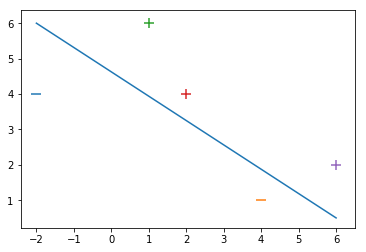

In [4]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    print(d, sample)
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

### loss function (최소화 할 대상)와 objective function  (최적화 대상)를 정의 해 봅시다.

#### Loss function
우리는 Hinge loss를 사용할 것입니다. 이것은 classifiers 훈련에 사용되는 손실 함수입니다. Hinge loss(경첩 손실)은 "최대 마진"분류, 특히 SVM (Support Vector Machine)에 사용됩니다.

<img src="https://camo.githubusercontent.com/037d9b87e5f7049bf61268e7ab27caa3345d1972/687474703a2f2f692e696d6775722e636f6d2f4f7a43777a794e2e706e67" />

c는 손실 함수, x는 샘플, y는 실제 레이블, f (x)는 예측 된 레이블

<img src="https://camo.githubusercontent.com/c971927c2a57b8dcd7e8dc6a1fee81eaa10b9a63/687474703a2f2f692e696d6775722e636f6d2f465a374a6347332e706e67" />

### Objective Function

<img src="https://camo.githubusercontent.com/56e9ded32847a76adb327f31ca9580cd2d5b1d05/687474703a2f2f692e696d6775722e636f6d2f49354e4e7534342e706e67" />

보시다시피 SVM의 목표는 두 가지 용어로 구성됩니다. 
첫 번째 용어는 regularizer이며, SVM의 핵심이며, 
두 번째 용어는 loss입니다. 
regularizer는 마진 최대화와 loss사이의 균형을 유지합니다. 
우리는 모든 데이터 점으로부터 최대한 멀리 떨어진 decision surface을 찾고자합니다.

loss를 최소화하고 objective(즉,학습)에 맞게 최적화하려면 어떻게 해야합니까?

우리는 그라디언트를 얻기 위해 목적 함수를 유도해야합니다! 그라데이션 하강 ftw. 우리는 두 가지 용어가 있으므로 차별화의 합계 규칙을 사용하여 분리하여 파생시킵니다.

<img src="https://camo.githubusercontent.com/03ab7412dff32425b1b2bec970a2da39c7e96a6e/687474703a2f2f692e696d6775722e636f6d2f36754b33426e482e706e67" />

즉, 잘못 분류 된 샘플이있는 경우 두 항목의 그라디언트를 사용하여 웨이트 벡터를 업데이트합니다. 
그렇지 않으면 올바르게 분류 된 경우 정규식 그라디언트로 w를 업데이트합니다.

잘못된 분류 조건
<img src="https://camo.githubusercontent.com/20d970c162f691f54b1797b77b58449b172bc59f/687474703a2f2f692e696d6775722e636f6d2f6739514c41796e2e706e67" />

가중치에 대한 업데이트 규칙 (잘못된 분류)

<img src="https://camo.githubusercontent.com/fbb72e96572184e6ea966da28431067694b7a20c/687474703a2f2f692e696d6775722e636f6d2f726b645070545a2e706e67" />

learning rate η와 regularizer λ를 포함하여 learning rate는 알고리즘이 오차 곡선에서 기울기를 내려가는 단계의 길이입니다.

    - learning rate가 너무 높습니까? 알고리즘이 최적 점을 초과 할 수 있습니다.
    - learning rate가 너무 낮습니까? 수렴하는데 너무 오래 걸릴 수 있습니다. 또는 결코 수렴하지 않습니다.
 
Regularizer는 낮은 train error를 달성하는 것과 보이지 않는 데이터를  일반화 할 수있는 낮은 테스트 오류 사이의 trade-off를 제어합니다.
Regulizing 매개 변수로 1/epoch를 선택하므로이 매개 변수는 epoch 수가 증가함에 따라 감소합니다.

    - Regularizer가 너무 높습니까? overfit (큰 테스트 오류)
    - Regularizer가 너무 낮습니까? underfit (큰 훈련 오류)

weight에 대한 업데이트 규칙 (올바르게 분류 됨)

<img src="https://camo.githubusercontent.com/dc310263c6a79f590c7c3043ee077738479c9668/687474703a2f2f692e696d6775722e636f6d2f78544b62765a362e706e67" />    
    


In [2]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

In [3]:
w = svm_sgd_plot(X,y)
#they decrease over time! Our SVM is learning the optimal hyperplane

enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]


enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]
enumerate : 3 [ 2  4 -1]
enumerate : 4 [ 6  2 -1]
enumerate : 0 [-2  4 -1]
enumerate : 1 [ 4  1 -1]
enumerate : 2 [ 1  6 -1]


KeyboardInterrupt: 

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')